### Problem Statement
#### Bussiness Permit Classification
<ul>
<li> Goal : To Predict whether person able to get Bussiness Permit/License</li>
<li> Objective: Based on given features we have to predicet whether person will be given licence or not to run the Bussiness</li>
<li> Dataset : Features and Target column as 'LICENSE STATUS'</li>
     <ul>
         <li> AAC: License cancelled during Term </li>
         <li> AAI: License was issued </li>
         <li> INQ: License require inquiry</li>
         <li> REA: License revocation was applied</li>
         <li> REV: Licence was revoked</li>
<ul>


### Workflow

* [Feature Engineering](#1.Feature-Engineering)
   * [Missing Values](#1.1.Missing-Values)
   * 

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [139]:
train_df=pd.read_csv('train_file.csv')
test_df=pd.read_csv('test_file.csv')

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [140]:
print('Train Data shape',train_df.shape)
print('Test Data shape',test_df.shape)

Train Data shape (85895, 32)
Test Data shape (57239, 31)


## Unique Values

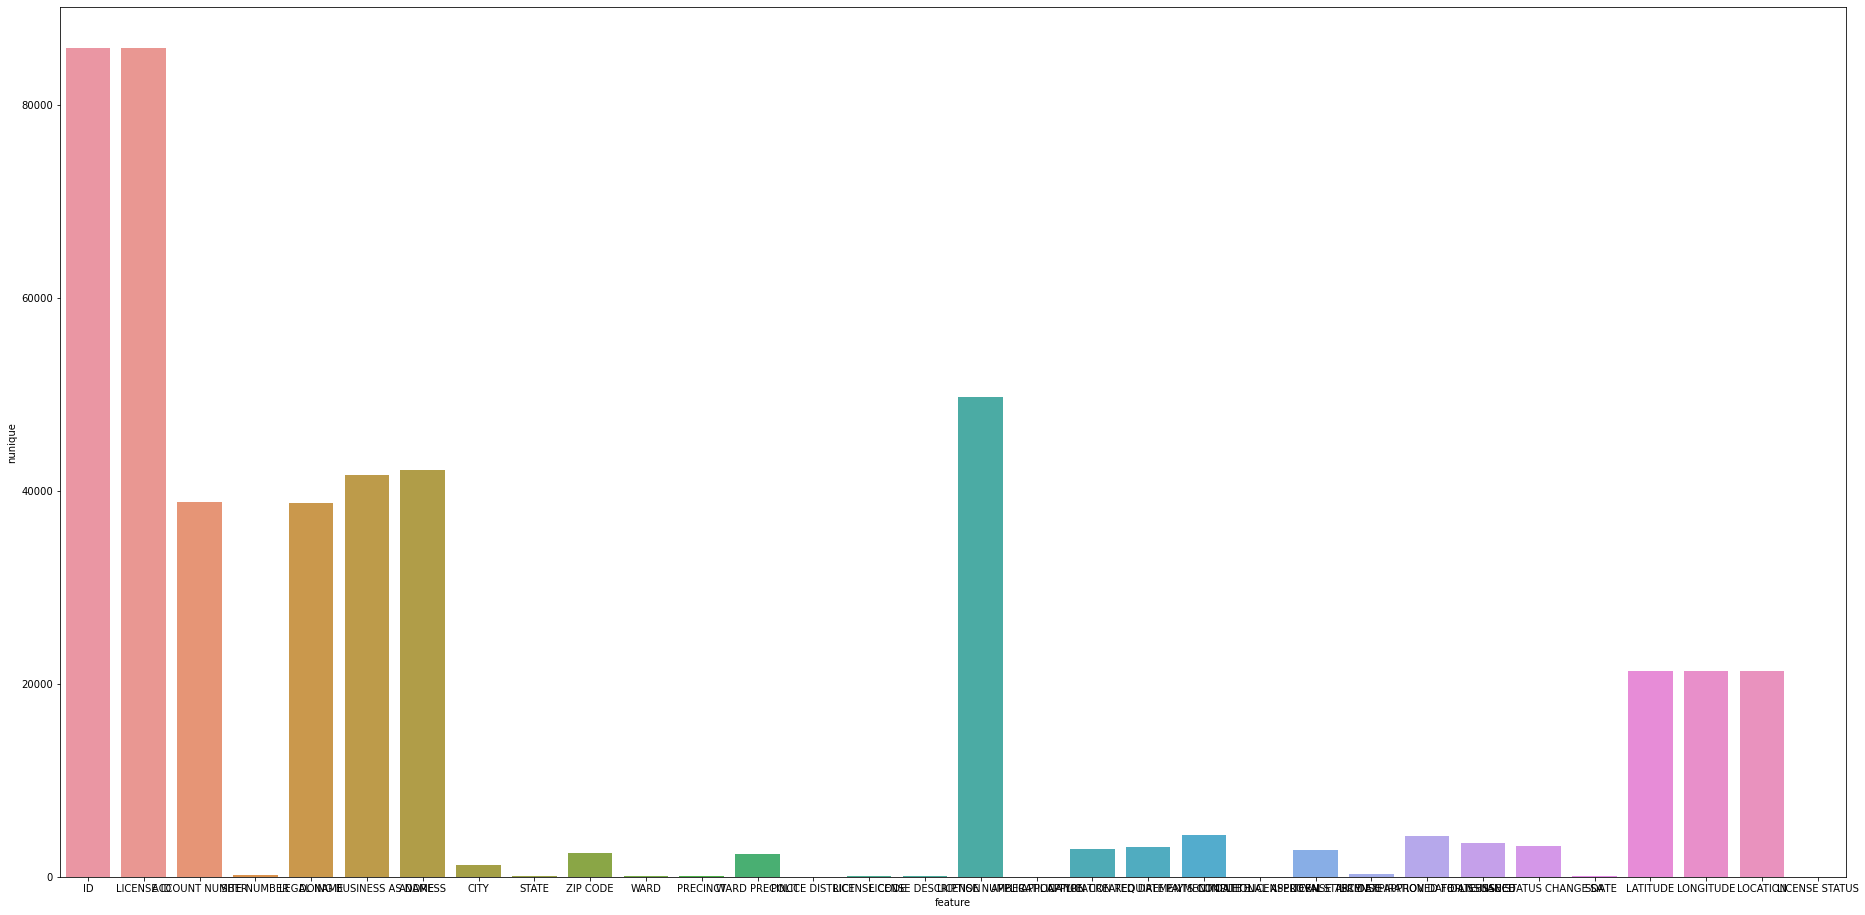

In [141]:
plt.figure(figsize=(32,16))
nu = train_df.nunique().reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)

### 1.Feature Engineering

### 1.1 Missing Values

In [142]:
train_df.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

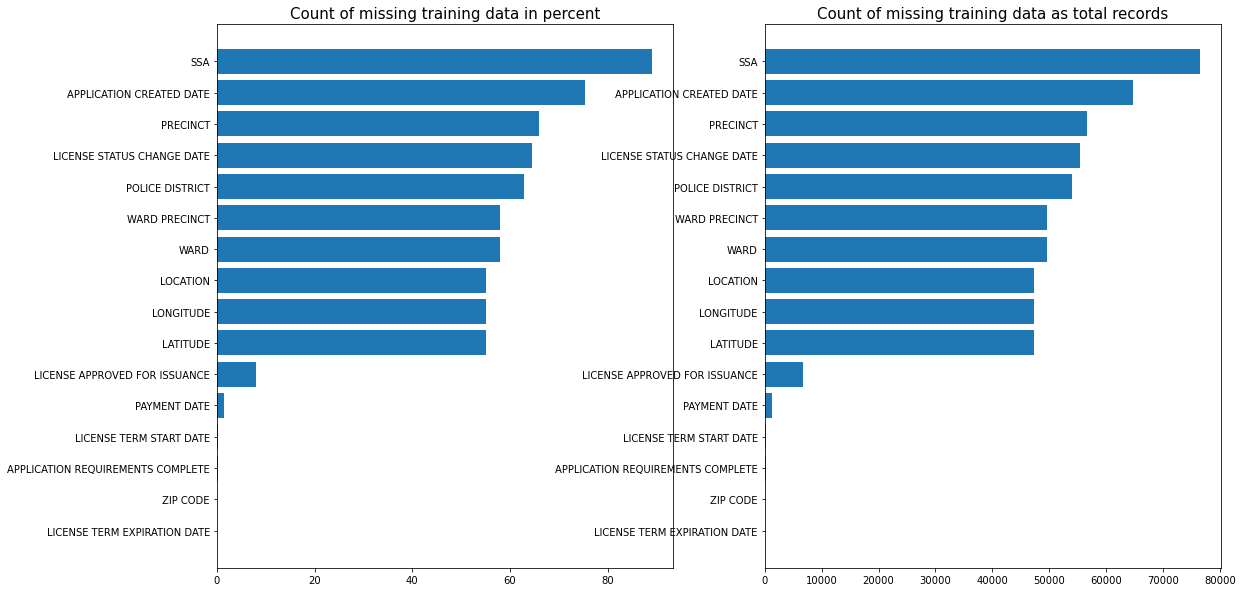

In [143]:
Exploratory = train_df.copy() 
nan_percent = Exploratory.isna().mean()*100
nan_count = Exploratory.isna().sum()
# print(pd.concat([nan_count.rename('missing_count'), nan_percent.round().rename('missing_percent')], axis=1))
# Capture the necessary data
variables = train_df.columns

count = []

for variable in variables:
    length = train_df[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(train_df), 2)
count = pd.Series(count)

missing = pd.DataFrame()
missing['variables'] = variables
missing['count'] = len(train_df) - count
missing['count_pct'] = 100 - count_pct
missing = missing[missing['count_pct'] > 0]
missing.sort_values(by=['count_pct'], inplace=True)
missing_train = np.array(missing['variables'])

#Plot number of available data per variable
plt.subplots(figsize=(18,10))

# Plots missing data in percentage
plt.subplot(1,2,1)
plt.barh(missing['variables'], missing['count_pct'])
plt.title('Count of missing training data in percent', fontsize=15)

# Plots total row number of missing data
plt.subplot(1,2,2)
plt.barh(missing['variables'], missing['count'])
plt.title('Count of missing training data as total records', fontsize=15)

plt.show()

## Target Variable Distribution

[Text(0, 0, 'AAI'),
 Text(0, 0, 'AAC'),
 Text(0, 0, 'REV'),
 Text(0, 0, 'REA'),
 Text(0, 0, 'INQ')]

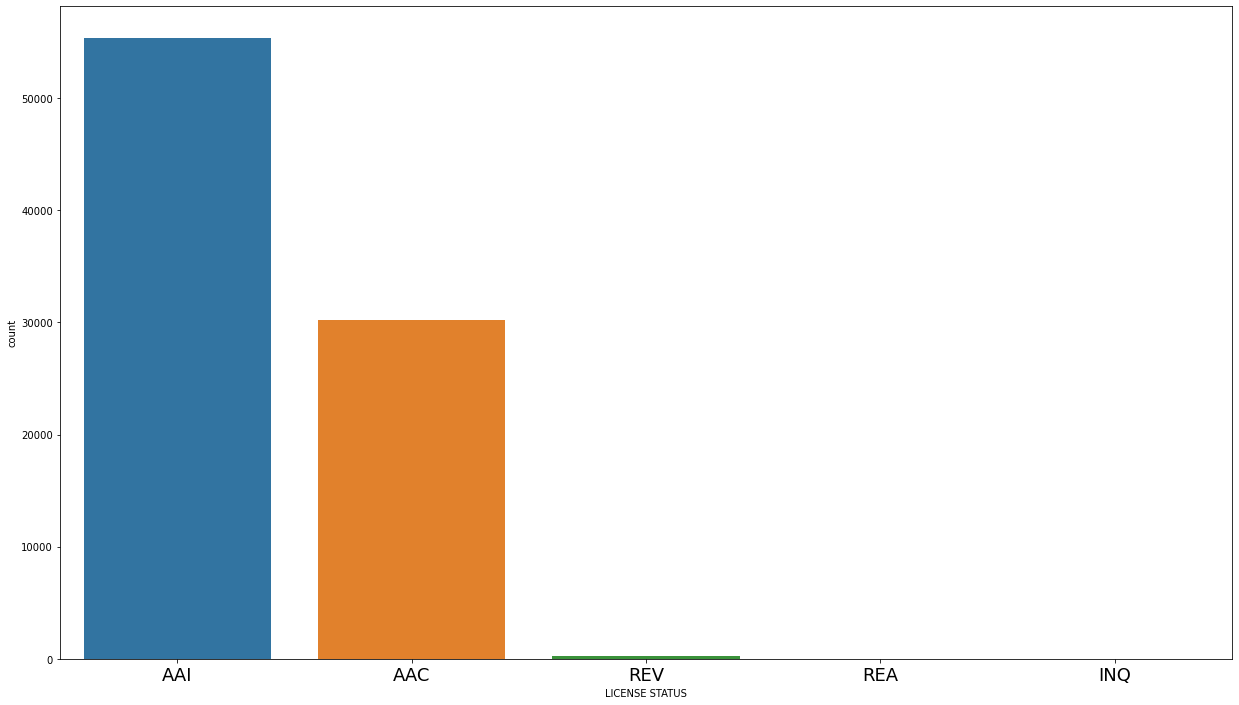

In [144]:
plt.figure(figsize=(21,12))
# count=train_df.groupby(['Category']).count().plot(kind='bar')

count_plot=sns.countplot(x='LICENSE STATUS', data=train_df)
count_plot.set_xticklabels(count_plot.get_xmajorticklabels(), fontsize = 18)

## Dealing with Locational data and Handling Missing values

In [145]:

# import folium
# Location=train_df[['LATITUDE','LONGITUDE']].dropna()
# m=folium.Map(location=[Location['LATITUDE'].mean(),Location['LONGITUDE'].mean()],zoom_start=5,tiles='Stamen toner')

# for _,row in (Location[:400].iterrows()):
#     folium.CircleMarker([row.LATITUDE,row.LONGITUDE],
#     radius=5,
#     color='orange',
#     fill=True,
#     fill_color='orange').add_to(m)
# m

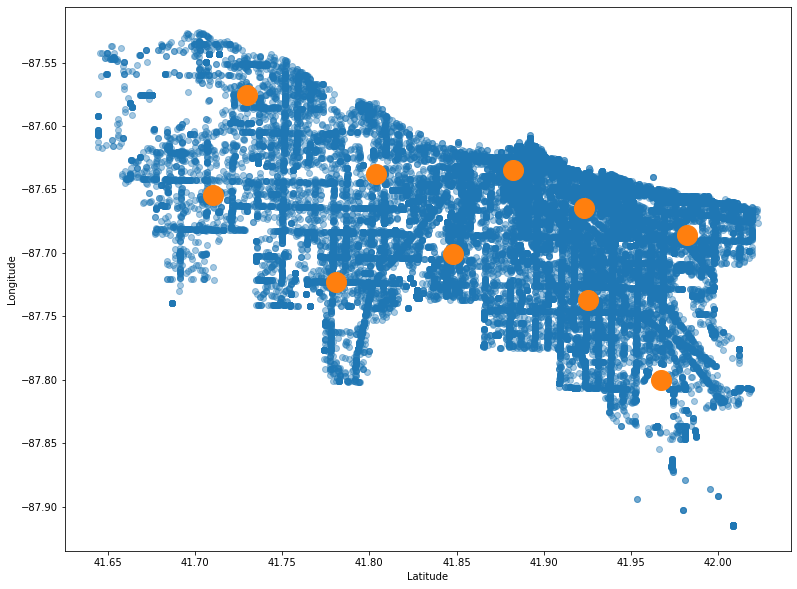

In [146]:
from sklearn.cluster import KMeans
clusters=10
Location=train_df[['LATITUDE','LONGITUDE']].dropna()
kmeans=KMeans(n_clusters=clusters,random_state=0).fit(Location[['LATITUDE','LONGITUDE']].values)
fig,ax1=plt.subplots(figsize=(13,10))
ax1.scatter(Location.LATITUDE,Location.LONGITUDE,alpha=0.4,label='samples')
ax1.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='centers',s=400)
ax1.set_ylabel('Longitude')
ax1.set_xlabel('Latitude')
kmean_feats=pd.DataFrame(kmeans.fit_transform(Location[['LATITUDE','LONGITUDE']].values),columns=['gspatial_' + str(i) for i in range(clusters)])
kmean_feats=pd.DataFrame(kmeans.fit_transform(Location[['LATITUDE','LONGITUDE']].values),index=np.unique(np.where(train_df[['LATITUDE','LONGITUDE']].notna())),columns=['gspatial_' + str(i) for i in range(clusters)])
train_df=pd.concat([train_df,kmean_feats],axis=1)


In [147]:
for i in range(0,clusters):
    train_df['gspatial_'+ str(i)]=train_df['gspatial_'+ str(i)].fillna(-999)

# for i in range(0,clusters):
#     test_df['gspatial_'+ str(i)]=test_df['gspatial_'+ str(i)].fillna(-999)


In [148]:
train_df['ZIP CODE'] = train_df['ZIP CODE'].astype(str)    
# test_df['ZIP CODE'] = test_df['ZIP CODE'].astype(str)

In [149]:

dtypes=list(train_df.iloc[0])
categorical_var=[]
date_var=[]
num_var=[]
print(len(train_df.columns))
for dtype,series_type,col in zip(dtypes,train_df.dtypes,train_df.columns):
    print(col,'---->',series_type,'------------->',type(dtype))
    
    
    if(series_type=='float64' or series_type=='int64'):
        num_var.append(col)
        train_df[col]=train_df[col].fillna(-999)   
        
    if(series_type=='object' and (col.find('DATE')==-1)):
        categorical_var.append(col)
        train_df[col]=train_df[col].fillna('')
        
        
    if col.find('DATE')!=-1 :
        date_var.append(col)
        train_df[col] = pd.to_datetime(test_df[col], format='%Y-%m-%d')
        
        train_df[col.rstrip('DATE')+'DAY'] = train_df[col].dt.day
        
        train_df[col.rstrip('DATE')+'WEEK'] = train_df[col].dt.week
        
        train_df[col.rstrip('DATE')+'YEAR'] = train_df[col].dt.year
        
        train_df[col]=train_df.drop(columns=col)
        
print(len(categorical_var)+len(date_var)+len(num_var))
        
print('cat',categorical_var)    
print('dat',date_var)
print('num',num_var)


42
ID ----> object -------------> <class 'str'>
LICENSE ID ----> int64 -------------> <class 'numpy.int64'>
ACCOUNT NUMBER ----> int64 -------------> <class 'numpy.int64'>
SITE NUMBER ----> int64 -------------> <class 'numpy.int64'>
LEGAL NAME ----> object -------------> <class 'str'>
DOING BUSINESS AS NAME ----> object -------------> <class 'str'>
ADDRESS ----> object -------------> <class 'str'>
CITY ----> object -------------> <class 'str'>
STATE ----> object -------------> <class 'str'>
ZIP CODE ----> object -------------> <class 'str'>
WARD ----> float64 -------------> <class 'numpy.float64'>
PRECINCT ----> float64 -------------> <class 'numpy.float64'>
WARD PRECINCT ----> object -------------> <class 'str'>
POLICE DISTRICT ----> float64 -------------> <class 'numpy.float64'>
LICENSE CODE ----> int64 -------------> <class 'numpy.int64'>
LICENSE DESCRIPTION ----> object -------------> <class 'str'>
LICENSE NUMBER ----> float64 -------------> <class 'numpy.float64'>
APPLICATION TYPE

<ipython-input-149-8cc9e4ca5de6>:25: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df[col.rstrip('DATE')+'WEEK'] = train_df[col].dt.week


APPLICATION REQUIREMENTS COMPLETE ----> object -------------> <class 'str'>
PAYMENT DATE ----> object -------------> <class 'str'>
CONDITIONAL APPROVAL ----> object -------------> <class 'str'>
LICENSE TERM START DATE ----> object -------------> <class 'str'>
LICENSE TERM EXPIRATION DATE ----> object -------------> <class 'str'>
LICENSE APPROVED FOR ISSUANCE ----> object -------------> <class 'str'>
DATE ISSUED ----> object -------------> <class 'str'>
LICENSE STATUS CHANGE DATE ----> object -------------> <class 'float'>
SSA ----> float64 -------------> <class 'numpy.float64'>
LATITUDE ----> float64 -------------> <class 'numpy.float64'>
LONGITUDE ----> float64 -------------> <class 'numpy.float64'>
LOCATION ----> object -------------> <class 'str'>
LICENSE STATUS ----> object -------------> <class 'str'>
gspatial_0 ----> float64 -------------> <class 'numpy.float64'>
gspatial_1 ----> float64 -------------> <class 'numpy.float64'>
gspatial_2 ----> float64 -------------> <class 'numpy.

In [ ]:
dtypes = list(test_df.iloc[0])
categorical_var = []
date_var = []
num_var = []
print(len(test_df.columns))
for dtype, series_type, col in zip(dtypes, test_df.dtypes, test_df.columns):
    print(col, '---->', series_type, '------------->', type(dtype))

    if (series_type == 'float64' or series_type == 'int64'):
        num_var.append(col)
        test_df[col] = test_df[col].fillna(-999)

    if (series_type == 'object' and (col.find('DATE') == -1)):
        categorical_var.append(col)
        test_df[col] = test_df[col].fillna('')

    if col.find('DATE') != -1:
        date_var.append(col)
        test_df[col] = pd.to_datetime(test_df[col], format='%Y-%m-%d')

        test_df[col.rstrip('DATE') + 'DAY'] = test_df[col].dt.day

        test_df[col.rstrip('DATE') + 'WEEK'] = test_df[col].dt.week

        test_df[col.rstrip('DATE') + 'YEAR'] = test_df[col].dt.year

        test_df[col] = test_df.drop(columns=col)

print(len(categorical_var) + len(date_var) + len(num_var))

print('cat', categorical_var)
print('dat', date_var)
print('num', num_var)


In [150]:
print(train_df.isna().sum())
train_df=train_df.fillna('')
train_df.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   0
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                 0
WARD                                     0
PRECINCT                                 0
WARD PRECINCT                            0
POLICE DISTRICT                          0
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE                 0
APPLICATION REQUIREMENTS COMPLETE        0
PAYMENT DATE                             0
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                  0
LICENSE TER

ID                                   0
LICENSE ID                           0
ACCOUNT NUMBER                       0
SITE NUMBER                          0
LEGAL NAME                           0
DOING BUSINESS AS NAME               0
ADDRESS                              0
CITY                                 0
STATE                                0
ZIP CODE                             0
WARD                                 0
PRECINCT                             0
WARD PRECINCT                        0
POLICE DISTRICT                      0
LICENSE CODE                         0
LICENSE DESCRIPTION                  0
LICENSE NUMBER                       0
APPLICATION TYPE                     0
APPLICATION CREATED DATE             0
APPLICATION REQUIREMENTS COMPLETE    0
PAYMENT DATE                         0
CONDITIONAL APPROVAL                 0
LICENSE TERM START DATE              0
LICENSE TERM EXPIRATION DATE         0
LICENSE APPROVED FOR ISSUANCE        0
DATE ISSUED              

In [151]:
print(date_var)
train_df=train_df.drop(columns=date_var)
train_df=train_df.drop(['LATITUDE','LONGITUDE'],axis=1)

['APPLICATION CREATED DATE', 'PAYMENT DATE', 'LICENSE TERM START DATE', 'LICENSE TERM EXPIRATION DATE', 'DATE ISSUED', 'LICENSE STATUS CHANGE DATE']


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
le=LabelEncoder()
ode=OrdinalEncoder()


In [153]:
y=train_df['LICENSE STATUS']
X=train_df.drop('LICENSE STATUS',axis=1)
y=le.fit_transform(y)
train_df['ZIP CODE']=le.fit_transform(train_df['ZIP CODE'])

In [154]:
X_train, X_test, y_train, y_test= train_test_split(X,y,shuffle=True,test_size=0.25)

In [155]:
import catboost
from catboost import CatBoostClassifier,Pool
from catboost.utils import get_gpu_device_count
print('\n%i GPU devices available' % get_gpu_device_count())


1 GPU devices available


In [158]:
# X.isna().sum()


categorical_var.remove('LICENSE STATUS')
# categorical_var

In [159]:
catboost_model=CatBoostClassifier(iterations=1500,
                                  depth=10,
                                  learning_rate=0.02,
                                  eval_metric='Accuracy',
                                  loss_function='MultiClass',
                                  task_type="GPU")


catboost_model.fit(X_train,y_train,cat_features=categorical_var,eval_set=(X_test,y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9336862	test: 0.9375524	best: 0.9375524 (0)	total: 154ms	remaining: 3m 51s
1:	learn: 0.9345400	test: 0.9385769	best: 0.9385769 (1)	total: 275ms	remaining: 3m 25s
2:	learn: 0.9347728	test: 0.9381112	best: 0.9385769 (1)	total: 399ms	remaining: 3m 19s
3:	learn: 0.9354403	test: 0.9385769	best: 0.9385769 (1)	total: 508ms	remaining: 3m 10s
4:	learn: 0.9361388	test: 0.9388097	best: 0.9388097 (4)	total: 613ms	remaining: 3m 3s
5:	learn: 0.9370392	test: 0.9389960	best: 0.9389960 (5)	total: 723ms	remaining: 2m 59s
6:	learn: 0.9370236	test: 0.9397411	best: 0.9397411 (6)	total: 823ms	remaining: 2m 55s
7:	learn: 0.9377066	test: 0.9401602	best: 0.9401602 (7)	total: 930ms	remaining: 2m 53s
8:	learn: 0.9377843	test: 0.9403930	best: 0.9403930 (8)	total: 1.04s	remaining: 2m 52s
9:	learn: 0.9383120	test: 0.9403465	best: 0.9403930 (8)	total: 1.16s	remaining: 2m 53s
10:	learn: 0.9380326	test: 0.9401602	best: 0.9403930 (8)	total: 1.28s	remaining: 2m 53s
11:	learn: 0.9378153	test: 0.9408121	best: 

94:	learn: 0.9409665	test: 0.9421160	best: 0.9421160 (79)	total: 10.2s	remaining: 2m 30s
95:	learn: 0.9410285	test: 0.9421626	best: 0.9421626 (95)	total: 10.3s	remaining: 2m 30s
96:	learn: 0.9411372	test: 0.9421160	best: 0.9421626 (95)	total: 10.4s	remaining: 2m 30s
97:	learn: 0.9411217	test: 0.9424886	best: 0.9424886 (97)	total: 10.5s	remaining: 2m 30s
98:	learn: 0.9412148	test: 0.9423023	best: 0.9424886 (97)	total: 10.6s	remaining: 2m 30s
99:	learn: 0.9412614	test: 0.9423955	best: 0.9424886 (97)	total: 10.7s	remaining: 2m 30s
100:	learn: 0.9413856	test: 0.9426283	best: 0.9426283 (100)	total: 10.8s	remaining: 2m 29s
101:	learn: 0.9414321	test: 0.9427214	best: 0.9427214 (101)	total: 10.9s	remaining: 2m 29s
102:	learn: 0.9414632	test: 0.9425352	best: 0.9427214 (101)	total: 11s	remaining: 2m 29s
103:	learn: 0.9415253	test: 0.9425817	best: 0.9427214 (101)	total: 11.1s	remaining: 2m 29s
104:	learn: 0.9416495	test: 0.9425352	best: 0.9427214 (101)	total: 11.2s	remaining: 2m 29s
105:	learn: 0

187:	learn: 0.9461666	test: 0.9452827	best: 0.9452827 (187)	total: 20s	remaining: 2m 19s
188:	learn: 0.9461977	test: 0.9452827	best: 0.9452827 (187)	total: 20.1s	remaining: 2m 19s
189:	learn: 0.9462598	test: 0.9453292	best: 0.9453292 (189)	total: 20.2s	remaining: 2m 19s
190:	learn: 0.9463374	test: 0.9453292	best: 0.9453292 (189)	total: 20.3s	remaining: 2m 19s
191:	learn: 0.9462908	test: 0.9452827	best: 0.9453292 (189)	total: 20.4s	remaining: 2m 19s
192:	learn: 0.9462908	test: 0.9454224	best: 0.9454224 (192)	total: 20.5s	remaining: 2m 19s
193:	learn: 0.9463684	test: 0.9454689	best: 0.9454689 (193)	total: 20.6s	remaining: 2m 18s
194:	learn: 0.9463995	test: 0.9454689	best: 0.9454689 (193)	total: 20.7s	remaining: 2m 18s
195:	learn: 0.9465392	test: 0.9454689	best: 0.9454689 (193)	total: 20.8s	remaining: 2m 18s
196:	learn: 0.9465857	test: 0.9454689	best: 0.9454689 (193)	total: 20.9s	remaining: 2m 18s
197:	learn: 0.9466478	test: 0.9455621	best: 0.9455621 (197)	total: 21.1s	remaining: 2m 18s
1

279:	learn: 0.9494885	test: 0.9460278	best: 0.9460278 (278)	total: 29.8s	remaining: 2m 9s
280:	learn: 0.9495661	test: 0.9459812	best: 0.9460278 (278)	total: 29.9s	remaining: 2m 9s
281:	learn: 0.9495506	test: 0.9460278	best: 0.9460278 (278)	total: 30s	remaining: 2m 9s
282:	learn: 0.9495506	test: 0.9460743	best: 0.9460743 (282)	total: 30.1s	remaining: 2m 9s
283:	learn: 0.9495972	test: 0.9461675	best: 0.9461675 (283)	total: 30.2s	remaining: 2m 9s
284:	learn: 0.9495972	test: 0.9461209	best: 0.9461675 (283)	total: 30.3s	remaining: 2m 9s
285:	learn: 0.9496282	test: 0.9461209	best: 0.9461675 (283)	total: 30.4s	remaining: 2m 9s
286:	learn: 0.9495972	test: 0.9460278	best: 0.9461675 (283)	total: 30.5s	remaining: 2m 9s
287:	learn: 0.9495972	test: 0.9461675	best: 0.9461675 (283)	total: 30.7s	remaining: 2m 8s
288:	learn: 0.9496593	test: 0.9461209	best: 0.9461675 (283)	total: 30.8s	remaining: 2m 8s
289:	learn: 0.9496127	test: 0.9461675	best: 0.9461675 (283)	total: 30.9s	remaining: 2m 8s
290:	learn: 

371:	learn: 0.9519101	test: 0.9465866	best: 0.9465866 (336)	total: 39.4s	remaining: 1m 59s
372:	learn: 0.9519877	test: 0.9465866	best: 0.9465866 (336)	total: 39.5s	remaining: 1m 59s
373:	learn: 0.9519877	test: 0.9465866	best: 0.9465866 (336)	total: 39.6s	remaining: 1m 59s
374:	learn: 0.9520032	test: 0.9465866	best: 0.9465866 (336)	total: 39.8s	remaining: 1m 59s
375:	learn: 0.9520964	test: 0.9467263	best: 0.9467263 (375)	total: 39.9s	remaining: 1m 59s
376:	learn: 0.9522050	test: 0.9467263	best: 0.9467263 (375)	total: 40s	remaining: 1m 59s
377:	learn: 0.9522361	test: 0.9467263	best: 0.9467263 (375)	total: 40.1s	remaining: 1m 58s
378:	learn: 0.9522361	test: 0.9467263	best: 0.9467263 (375)	total: 40.2s	remaining: 1m 58s
379:	learn: 0.9522982	test: 0.9466331	best: 0.9467263 (375)	total: 40.3s	remaining: 1m 58s
380:	learn: 0.9522516	test: 0.9467728	best: 0.9467728 (380)	total: 40.4s	remaining: 1m 58s
381:	learn: 0.9522982	test: 0.9466331	best: 0.9467728 (380)	total: 40.5s	remaining: 1m 58s
3

462:	learn: 0.9539125	test: 0.9464934	best: 0.9468660 (418)	total: 48.8s	remaining: 1m 49s
463:	learn: 0.9539436	test: 0.9464003	best: 0.9468660 (418)	total: 48.9s	remaining: 1m 49s
464:	learn: 0.9539591	test: 0.9464934	best: 0.9468660 (418)	total: 49s	remaining: 1m 49s
465:	learn: 0.9539591	test: 0.9464934	best: 0.9468660 (418)	total: 49.1s	remaining: 1m 49s
466:	learn: 0.9539746	test: 0.9464934	best: 0.9468660 (418)	total: 49.2s	remaining: 1m 48s
467:	learn: 0.9539746	test: 0.9465400	best: 0.9468660 (418)	total: 49.3s	remaining: 1m 48s
468:	learn: 0.9540057	test: 0.9465400	best: 0.9468660 (418)	total: 49.4s	remaining: 1m 48s
469:	learn: 0.9540057	test: 0.9465400	best: 0.9468660 (418)	total: 49.5s	remaining: 1m 48s
470:	learn: 0.9540057	test: 0.9464934	best: 0.9468660 (418)	total: 49.6s	remaining: 1m 48s
471:	learn: 0.9540833	test: 0.9464469	best: 0.9468660 (418)	total: 49.7s	remaining: 1m 48s
472:	learn: 0.9540523	test: 0.9465866	best: 0.9468660 (418)	total: 49.8s	remaining: 1m 48s
4

554:	learn: 0.9554493	test: 0.9467728	best: 0.9471454 (528)	total: 58.3s	remaining: 1m 39s
555:	learn: 0.9554493	test: 0.9467263	best: 0.9471454 (528)	total: 58.5s	remaining: 1m 39s
556:	learn: 0.9554338	test: 0.9469125	best: 0.9471454 (528)	total: 58.5s	remaining: 1m 39s
557:	learn: 0.9554648	test: 0.9468660	best: 0.9471454 (528)	total: 58.7s	remaining: 1m 39s
558:	learn: 0.9554338	test: 0.9468194	best: 0.9471454 (528)	total: 58.8s	remaining: 1m 38s
559:	learn: 0.9554804	test: 0.9468660	best: 0.9471454 (528)	total: 58.9s	remaining: 1m 38s
560:	learn: 0.9554648	test: 0.9468660	best: 0.9471454 (528)	total: 59s	remaining: 1m 38s
561:	learn: 0.9555269	test: 0.9469591	best: 0.9471454 (528)	total: 59.1s	remaining: 1m 38s
562:	learn: 0.9556201	test: 0.9470057	best: 0.9471454 (528)	total: 59.2s	remaining: 1m 38s
563:	learn: 0.9556201	test: 0.9470057	best: 0.9471454 (528)	total: 59.3s	remaining: 1m 38s
564:	learn: 0.9556666	test: 0.9470057	best: 0.9471454 (528)	total: 59.4s	remaining: 1m 38s
5

647:	learn: 0.9570947	test: 0.9472385	best: 0.9473782 (642)	total: 1m 7s	remaining: 1m 29s
648:	learn: 0.9571103	test: 0.9473782	best: 0.9473782 (642)	total: 1m 8s	remaining: 1m 29s
649:	learn: 0.9571413	test: 0.9474248	best: 0.9474248 (649)	total: 1m 8s	remaining: 1m 29s
650:	learn: 0.9571413	test: 0.9474714	best: 0.9474714 (650)	total: 1m 8s	remaining: 1m 28s
651:	learn: 0.9571413	test: 0.9474248	best: 0.9474714 (650)	total: 1m 8s	remaining: 1m 28s
652:	learn: 0.9572034	test: 0.9475645	best: 0.9475645 (652)	total: 1m 8s	remaining: 1m 28s
653:	learn: 0.9571879	test: 0.9474714	best: 0.9475645 (652)	total: 1m 8s	remaining: 1m 28s
654:	learn: 0.9572034	test: 0.9474248	best: 0.9475645 (652)	total: 1m 8s	remaining: 1m 28s
655:	learn: 0.9571568	test: 0.9475645	best: 0.9475645 (652)	total: 1m 8s	remaining: 1m 28s
656:	learn: 0.9571879	test: 0.9474248	best: 0.9475645 (652)	total: 1m 8s	remaining: 1m 28s
657:	learn: 0.9572034	test: 0.9474714	best: 0.9475645 (652)	total: 1m 8s	remaining: 1m 28s

739:	learn: 0.9584142	test: 0.9477508	best: 0.9477973 (728)	total: 1m 17s	remaining: 1m 19s
740:	learn: 0.9584918	test: 0.9477508	best: 0.9477973 (728)	total: 1m 17s	remaining: 1m 19s
741:	learn: 0.9584918	test: 0.9477508	best: 0.9477973 (728)	total: 1m 17s	remaining: 1m 19s
742:	learn: 0.9585228	test: 0.9478439	best: 0.9478439 (742)	total: 1m 17s	remaining: 1m 19s
743:	learn: 0.9585228	test: 0.9478905	best: 0.9478905 (743)	total: 1m 17s	remaining: 1m 18s
744:	learn: 0.9585228	test: 0.9479370	best: 0.9479370 (744)	total: 1m 17s	remaining: 1m 18s
745:	learn: 0.9585228	test: 0.9478905	best: 0.9479370 (744)	total: 1m 17s	remaining: 1m 18s
746:	learn: 0.9586005	test: 0.9479370	best: 0.9479370 (744)	total: 1m 18s	remaining: 1m 18s
747:	learn: 0.9585849	test: 0.9479370	best: 0.9479370 (744)	total: 1m 18s	remaining: 1m 18s
748:	learn: 0.9585849	test: 0.9479836	best: 0.9479836 (748)	total: 1m 18s	remaining: 1m 18s
749:	learn: 0.9585694	test: 0.9479370	best: 0.9479836 (748)	total: 1m 18s	remain

829:	learn: 0.9598578	test: 0.9476576	best: 0.9482630 (791)	total: 1m 26s	remaining: 1m 9s
830:	learn: 0.9599044	test: 0.9476576	best: 0.9482630 (791)	total: 1m 26s	remaining: 1m 9s
831:	learn: 0.9598733	test: 0.9477508	best: 0.9482630 (791)	total: 1m 26s	remaining: 1m 9s
832:	learn: 0.9599199	test: 0.9477508	best: 0.9482630 (791)	total: 1m 26s	remaining: 1m 9s
833:	learn: 0.9599354	test: 0.9477508	best: 0.9482630 (791)	total: 1m 27s	remaining: 1m 9s
834:	learn: 0.9599044	test: 0.9477508	best: 0.9482630 (791)	total: 1m 27s	remaining: 1m 9s
835:	learn: 0.9599044	test: 0.9477508	best: 0.9482630 (791)	total: 1m 27s	remaining: 1m 9s
836:	learn: 0.9598733	test: 0.9478905	best: 0.9482630 (791)	total: 1m 27s	remaining: 1m 9s
837:	learn: 0.9598423	test: 0.9478439	best: 0.9482630 (791)	total: 1m 27s	remaining: 1m 9s
838:	learn: 0.9598578	test: 0.9478439	best: 0.9482630 (791)	total: 1m 27s	remaining: 1m 9s
839:	learn: 0.9598889	test: 0.9478439	best: 0.9482630 (791)	total: 1m 27s	remaining: 1m 8s

920:	learn: 0.9610996	test: 0.9481233	best: 0.9482630 (791)	total: 1m 36s	remaining: 1m
921:	learn: 0.9611152	test: 0.9480767	best: 0.9482630 (791)	total: 1m 36s	remaining: 1m
922:	learn: 0.9611307	test: 0.9481233	best: 0.9482630 (791)	total: 1m 36s	remaining: 1m
923:	learn: 0.9611307	test: 0.9481233	best: 0.9482630 (791)	total: 1m 36s	remaining: 1m
924:	learn: 0.9611617	test: 0.9481233	best: 0.9482630 (791)	total: 1m 36s	remaining: 60s
925:	learn: 0.9611307	test: 0.9480302	best: 0.9482630 (791)	total: 1m 36s	remaining: 59.9s
926:	learn: 0.9611462	test: 0.9480767	best: 0.9482630 (791)	total: 1m 36s	remaining: 59.8s
927:	learn: 0.9611617	test: 0.9481233	best: 0.9482630 (791)	total: 1m 36s	remaining: 59.7s
928:	learn: 0.9611773	test: 0.9480302	best: 0.9482630 (791)	total: 1m 36s	remaining: 59.6s
929:	learn: 0.9611773	test: 0.9480767	best: 0.9482630 (791)	total: 1m 37s	remaining: 59.5s
930:	learn: 0.9612083	test: 0.9480302	best: 0.9482630 (791)	total: 1m 37s	remaining: 59.4s
931:	learn: 0

1011:	learn: 0.9622949	test: 0.9477973	best: 0.9482630 (791)	total: 1m 45s	remaining: 50.9s
1012:	learn: 0.9623104	test: 0.9477973	best: 0.9482630 (791)	total: 1m 45s	remaining: 50.8s
1013:	learn: 0.9623880	test: 0.9478439	best: 0.9482630 (791)	total: 1m 45s	remaining: 50.7s
1014:	learn: 0.9624036	test: 0.9478439	best: 0.9482630 (791)	total: 1m 45s	remaining: 50.6s
1015:	learn: 0.9624036	test: 0.9479836	best: 0.9482630 (791)	total: 1m 45s	remaining: 50.5s
1016:	learn: 0.9624191	test: 0.9479836	best: 0.9482630 (791)	total: 1m 46s	remaining: 50.3s
1017:	learn: 0.9624501	test: 0.9479370	best: 0.9482630 (791)	total: 1m 46s	remaining: 50.2s
1018:	learn: 0.9624967	test: 0.9479370	best: 0.9482630 (791)	total: 1m 46s	remaining: 50.1s
1019:	learn: 0.9624967	test: 0.9479370	best: 0.9482630 (791)	total: 1m 46s	remaining: 50s
1020:	learn: 0.9625433	test: 0.9479370	best: 0.9482630 (791)	total: 1m 46s	remaining: 49.9s
1021:	learn: 0.9625433	test: 0.9479370	best: 0.9482630 (791)	total: 1m 46s	remaini

1101:	learn: 0.9634436	test: 0.9481699	best: 0.9482630 (791)	total: 1m 54s	remaining: 41.5s
1102:	learn: 0.9635057	test: 0.9481699	best: 0.9482630 (791)	total: 1m 54s	remaining: 41.4s
1103:	learn: 0.9635212	test: 0.9481699	best: 0.9482630 (791)	total: 1m 55s	remaining: 41.3s
1104:	learn: 0.9634902	test: 0.9480767	best: 0.9482630 (791)	total: 1m 55s	remaining: 41.2s
1105:	learn: 0.9635057	test: 0.9480767	best: 0.9482630 (791)	total: 1m 55s	remaining: 41.1s
1106:	learn: 0.9635057	test: 0.9479836	best: 0.9482630 (791)	total: 1m 55s	remaining: 41s
1107:	learn: 0.9635367	test: 0.9479836	best: 0.9482630 (791)	total: 1m 55s	remaining: 40.9s
1108:	learn: 0.9635057	test: 0.9481699	best: 0.9482630 (791)	total: 1m 55s	remaining: 40.8s
1109:	learn: 0.9636143	test: 0.9480767	best: 0.9482630 (791)	total: 1m 55s	remaining: 40.7s
1110:	learn: 0.9636299	test: 0.9480302	best: 0.9482630 (791)	total: 1m 56s	remaining: 40.6s
1111:	learn: 0.9635988	test: 0.9479836	best: 0.9482630 (791)	total: 1m 56s	remaini

1194:	learn: 0.9649493	test: 0.9479370	best: 0.9482630 (791)	total: 2m 3s	remaining: 31.4s
1195:	learn: 0.9649648	test: 0.9479370	best: 0.9482630 (791)	total: 2m 3s	remaining: 31.3s
1196:	learn: 0.9649804	test: 0.9479370	best: 0.9482630 (791)	total: 2m 3s	remaining: 31.2s
1197:	learn: 0.9650425	test: 0.9479370	best: 0.9482630 (791)	total: 2m 3s	remaining: 31.1s
1198:	learn: 0.9650269	test: 0.9480767	best: 0.9482630 (791)	total: 2m 3s	remaining: 31s
1199:	learn: 0.9650580	test: 0.9481233	best: 0.9482630 (791)	total: 2m 3s	remaining: 30.9s
1200:	learn: 0.9650580	test: 0.9481233	best: 0.9482630 (791)	total: 2m 3s	remaining: 30.8s
1201:	learn: 0.9650735	test: 0.9481699	best: 0.9482630 (791)	total: 2m 3s	remaining: 30.7s
1202:	learn: 0.9650580	test: 0.9482630	best: 0.9482630 (791)	total: 2m 3s	remaining: 30.6s
1203:	learn: 0.9650425	test: 0.9481699	best: 0.9482630 (791)	total: 2m 3s	remaining: 30.5s
1204:	learn: 0.9650890	test: 0.9481699	best: 0.9482630 (791)	total: 2m 4s	remaining: 30.4s
1

1286:	learn: 0.9661446	test: 0.9483096	best: 0.9483562 (1239)	total: 2m 12s	remaining: 22s
1287:	learn: 0.9661756	test: 0.9482630	best: 0.9483562 (1239)	total: 2m 12s	remaining: 21.9s
1288:	learn: 0.9661911	test: 0.9483562	best: 0.9483562 (1239)	total: 2m 12s	remaining: 21.8s
1289:	learn: 0.9661756	test: 0.9484027	best: 0.9484027 (1289)	total: 2m 13s	remaining: 21.7s
1290:	learn: 0.9661601	test: 0.9484027	best: 0.9484027 (1289)	total: 2m 13s	remaining: 21.6s
1291:	learn: 0.9661911	test: 0.9484027	best: 0.9484027 (1289)	total: 2m 13s	remaining: 21.4s
1292:	learn: 0.9661911	test: 0.9484027	best: 0.9484027 (1289)	total: 2m 13s	remaining: 21.3s
1293:	learn: 0.9662067	test: 0.9484493	best: 0.9484493 (1293)	total: 2m 13s	remaining: 21.2s
1294:	learn: 0.9661911	test: 0.9484493	best: 0.9484493 (1293)	total: 2m 13s	remaining: 21.1s
1295:	learn: 0.9662222	test: 0.9484959	best: 0.9484959 (1295)	total: 2m 13s	remaining: 21s
1296:	learn: 0.9662688	test: 0.9484493	best: 0.9484959 (1295)	total: 2m 13

1376:	learn: 0.9670760	test: 0.9482164	best: 0.9484959 (1295)	total: 2m 21s	remaining: 12.6s
1377:	learn: 0.9671070	test: 0.9481699	best: 0.9484959 (1295)	total: 2m 21s	remaining: 12.5s
1378:	learn: 0.9670915	test: 0.9481233	best: 0.9484959 (1295)	total: 2m 21s	remaining: 12.4s
1379:	learn: 0.9671225	test: 0.9481699	best: 0.9484959 (1295)	total: 2m 21s	remaining: 12.3s
1380:	learn: 0.9671380	test: 0.9482164	best: 0.9484959 (1295)	total: 2m 21s	remaining: 12.2s
1381:	learn: 0.9671070	test: 0.9481699	best: 0.9484959 (1295)	total: 2m 21s	remaining: 12.1s
1382:	learn: 0.9671536	test: 0.9482164	best: 0.9484959 (1295)	total: 2m 21s	remaining: 12s
1383:	learn: 0.9671846	test: 0.9481699	best: 0.9484959 (1295)	total: 2m 21s	remaining: 11.9s
1384:	learn: 0.9671691	test: 0.9482630	best: 0.9484959 (1295)	total: 2m 21s	remaining: 11.8s
1385:	learn: 0.9672001	test: 0.9482164	best: 0.9484959 (1295)	total: 2m 22s	remaining: 11.7s
1386:	learn: 0.9672312	test: 0.9481699	best: 0.9484959 (1295)	total: 2m 

1465:	learn: 0.9681160	test: 0.9479836	best: 0.9484959 (1295)	total: 2m 29s	remaining: 3.46s
1466:	learn: 0.9680849	test: 0.9479836	best: 0.9484959 (1295)	total: 2m 29s	remaining: 3.36s
1467:	learn: 0.9680849	test: 0.9479836	best: 0.9484959 (1295)	total: 2m 29s	remaining: 3.25s
1468:	learn: 0.9680849	test: 0.9480302	best: 0.9484959 (1295)	total: 2m 29s	remaining: 3.15s
1469:	learn: 0.9681005	test: 0.9480302	best: 0.9484959 (1295)	total: 2m 29s	remaining: 3.05s
1470:	learn: 0.9681160	test: 0.9480767	best: 0.9484959 (1295)	total: 2m 29s	remaining: 2.95s
1471:	learn: 0.9681315	test: 0.9480302	best: 0.9484959 (1295)	total: 2m 29s	remaining: 2.85s
1472:	learn: 0.9681315	test: 0.9480302	best: 0.9484959 (1295)	total: 2m 29s	remaining: 2.74s
1473:	learn: 0.9681626	test: 0.9480767	best: 0.9484959 (1295)	total: 2m 29s	remaining: 2.64s
1474:	learn: 0.9681005	test: 0.9480302	best: 0.9484959 (1295)	total: 2m 29s	remaining: 2.54s
1475:	learn: 0.9681005	test: 0.9479836	best: 0.9484959 (1295)	total: 2